In [1]:
import numpy as np
import loadcifar10 as lc
import knn
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
def plot(accuracy_per_class, accuracy, color, names):
    ind = np.arange(10)
    width = 0.5
    fig, ax = plt.subplots()
    rects = ax.bar(ind, accuracy_per_class, width, color='b')
    ax.set_ylabel('Accuracy')
    ax.set_title('KNN on %s CIFAR-10 accuracy per class, average accuracy = %f' % (color, accuracy))
    ax.set_xticks(ind)
    ax.set_xticklabels(names, rotation='vertical')
    plt.show()

In [4]:
def get_accuracy(predict, yte):
    accuracy_per_class = [0.] * 10
    for i in range(predict.shape[0]):
        if predict[i] == yte[i]:
            accuracy_per_class[yte[i]] += 1.
    for i in range(10):
        accuracy_per_class[i] /= 1000
    accuracy = np.sum(predict == yte) / 10000
    return accuracy_per_class, accuracy

In [5]:
def train_and_predict(xtr, ytr, xte, yte, k, l, color, names):
    knn_o = knn.KNN()
    knn_o.train(xtr, ytr)
    predict = knn_o.predict(xte, k, l)
    accuracy_per_class, accuracy = get_accuracy(predict, yte)
    plot(accuracy_per_class, accuracy, color, names)

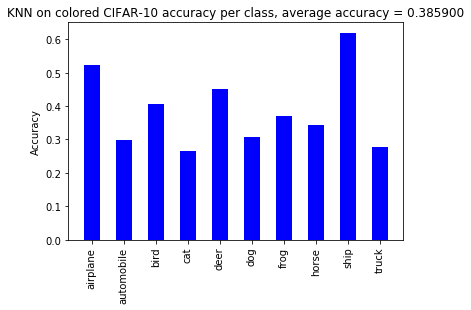

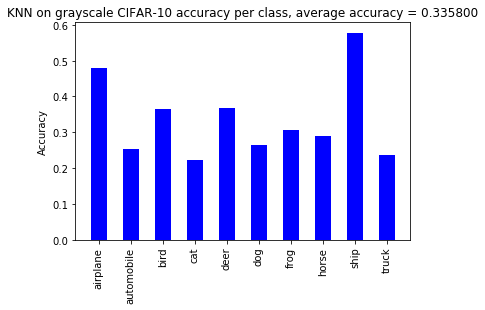

In [6]:
xtr, xgtr, ytr, xte, xgte, yte, names = lc.load_cifar('cifar-10-batches-py')
# best_k and best_l from cross-validation are k=1 and L1
best_k = 1
best_l = 'L1'
train_and_predict(xtr, ytr, xte, yte, best_k, best_l, 'colored', names)
train_and_predict(xgtr, ytr, xgte, yte, best_k, best_l, 'grayscale', names)